In [70]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn import linear_model 

Verif [[4.]
 [3.]]
TheTa [[-16.57192558]
 [  3.00063382]]
mse: 729772.7729679958


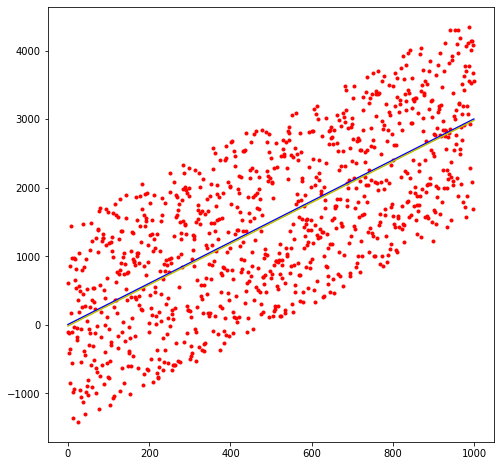

In [81]:

MAX=1000
    
X=  np.arange( 0, MAX )
T= 4+3*X  
Y= T + (np.random.rand(1,MAX)-0.5)[0]*3000 


Xmat=np.c_[np.ones((len(X),1)),np.mat(X).T]
Ymat=np.mat(T).T

Verif=np.linalg.inv(Xmat.T.dot(Xmat)).dot(Xmat.T).dot(Ymat)
print("Verif",Verif)


Xmat=np.c_[np.ones((len(X),1)),np.mat(X).T]
Ymat=np.mat(Y).T
TheTa=np.linalg.inv(Xmat.T.dot(Xmat)).dot(Xmat.T).dot(Ymat)
print("TheTa",TheTa)

ThetaD=np.array(TheTa[0])+np.array(TheTa[1])*X

def MSE(Y, YH):
     return np.square(Y - YH).mean()
    
error=(Y-T) 

print("mse:",MSE(T,Y))


fig = plt.figure(1,figsize=(8,8))
plt.plot(X,Y,"r.")# model lineaire bruité
plt.plot(X,T,"b-")# model lineaire
plt.plot(X,ThetaD.T,"y-") # taux erreur de base deux precedents
plt.show()



In [82]:
print("X.shape", X.shape)
print("Y.shape", Y.shape)

X_train=X[:800]
X_test=X[800:]

Y_train=Y[:800]
Y_test=Y[800:]


X_train=np.mat(X_train).T
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)

x=X_train
y=Y_train


X.shape (1000,)
Y.shape (1000,)
X_train (800, 1)
Y_train (800,)


In [116]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=0)
X_train=np.mat(X_train).T

x=X_train
y=Y_train

In [117]:
print("x", x.shape)
print("y", y.shape)


lr = linear_model.LinearRegression()
scores=sklearn.model_selection.cross_val_score(lr,x ,y ,  cv=5)
print("score",scores)
print("moyenne :%0.03f , deviation: :%0.03f" % (scores.mean(), scores.std()))
#validate=sklearn.model_selection.cross_validate(lr,x ,y ,  cv=cv) # pour obtenir des metriques
#print("validate",validate)

x (800, 1)
y (800,)
score [0.58906939 0.51125452 0.44598289 0.51377823 0.4464879 ]
moyenne :0.501 , deviation: :0.053


prediction (800,)


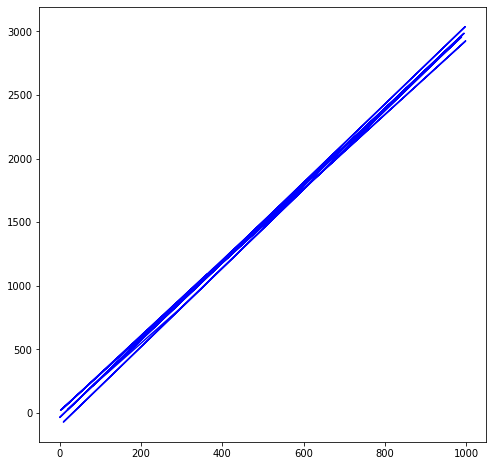

In [118]:

prediction=sklearn.model_selection.cross_val_predict(lr,x ,y ,  cv=5)
print("prediction", prediction.shape)

fig = plt.figure(1,figsize=(8,8))
#plt.plot(X,Y,"r.")# model lineaire bruité
plt.plot(X_train,prediction,"b-")# model lineaire
plt.show()

Coefficients: 
 [3.02352243]
Mean squared error: 739598.91


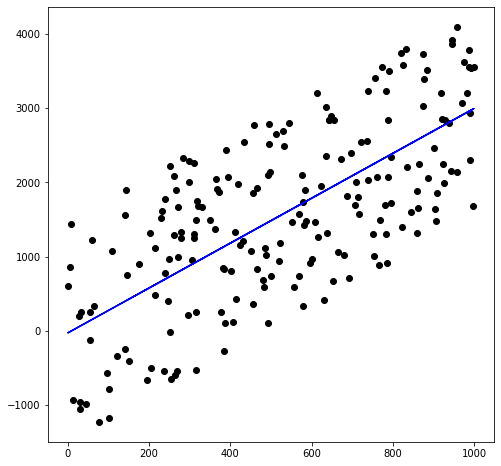

In [123]:
from sklearn.metrics import mean_squared_error, r2_score

lr = linear_model.LinearRegression()
lr.fit(X_train,Y_train)

print('Coefficients: \n', lr.coef_)

Y_pred = lr.predict(np.mat(X_test).T)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred))

# Plot outputs
fig = plt.figure(1,figsize=(8,8))
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue')
plt.show()
